# Practical 1 &ndash; Linear regressions in Julia

10 April 2022

**Instructor &ndash;**  Benoit Legat  
**TA &ndash;** Jean Bouchat

---

In this session, we'll get right into coding to import, visualize, and analyze a dataset gathered by the World Health Organization (WHO) on life expectancy. The goal is to familiarize yourself with Julia, the use of a Jupyter notebook, and get an overview of one of the most popular data analysis methods in research, linear regression.

## Dataset import

The very first step in any data analysis is to get the data. We downloaded the ones we will use today on [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

The data set we want to exploit is contained in a csv file, and Julia is not able to open these files natively. Two separate libraries are actually needed: `CSV` et `DataFrames` [\[go further: Read CSV to Data Frame in Julia\]](https://towardsdatascience.com/read-csv-to-data-frame-in-julia-programming-lang-77f3d0081c14).

Let us install them, if it is not already done,

In [ ]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

and then import them to be able to actually use them

In [1]:
using CSV
using DataFrames

We can now read the csv file that we want to explore

In [2]:
csv_file = CSV.File("./Life Expectancy Data.csv")

2938-element CSV.File:
 CSV.Row: (Country = "Afghanistan", Year = 2015, Status = "Developing", Life expectancy  = 65.0, Adult Mortality = 263, infant deaths = 62, Alcohol = 0.01, percentage expenditure = 71.27962362, Hepatitis B = 65, Measles  = 1154,  BMI  = 19.1, under-five deaths  = 83, Polio = 6, Total expenditure = 8.16, Diphtheria  = 65,  HIV/AIDS = 0.1, GDP = 584.25921, Population = 3.3736494e7,  thinness  1-19 years = 17.2,  thinness 5-9 years = 17.3, Income composition of resources = 0.479, Schooling = 10.1)
 CSV.Row: (Country = "Afghanistan", Year = 2014, Status = "Developing", Life expectancy  = 59.9, Adult Mortality = 271, infant deaths = 64, Alcohol = 0.01, percentage expenditure = 73.52358168, Hepatitis B = 62, Measles  = 492,  BMI  = 18.6, under-five deaths  = 86, Polio = 58, Total expenditure = 8.18, Diphtheria  = 62,  HIV/AIDS = 0.1, GDP = 612.696514, Population = 327582.0,  thinness  1-19 years = 17.5,  thinness 5-9 years = 17.5, Income composition of resources = 0.47

In [3]:
for row in csv_file[1:3]
    println(row)
end

CSV.Row:
 :Country                                       "Afghanistan"
 :Year                                      2015
 :Status                                        "Developing"
 Symbol("Life expectancy ")                   65.0
 Symbol("Adult Mortality")                   263
 Symbol("infant deaths")                      62
 :Alcohol                                      0.01
 Symbol("percentage expenditure")             71.27962362
 Symbol("Hepatitis B")                        65
 Symbol("Measles ")                         1154
 Symbol(" BMI ")                              19.1
 Symbol("under-five deaths ")                 83
 :Polio                                        6
 Symbol("Total expenditure")                   8.16
 Symbol("Diphtheria ")                        65
 Symbol(" HIV/AIDS")                           0.1
 :GDP                                        584.25921
 :Population                                   3.3736494e7
 Symbol(" thinness  1-19 years")              1

As you can see, while `CSV` allows us to read (and write) into csv files, it is not made for data manipulation. The `DataFrames` package is much more convenient for manipulating data tables. Check out its documentation https://dataframes.juliadata.org/stable/ if you want to learn more about it.

Let us now generate a dataframe with the contents of our csv file.

In [4]:
df = DataFrame(csv_file)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths
,String,Int64,String15,Float64?,Int64?,Int64
1,Afghanistan,2015,Developing,65.0,263,62
2,Afghanistan,2014,Developing,59.9,271,64
3,Afghanistan,2013,Developing,59.9,268,66
4,Afghanistan,2012,Developing,59.5,272,69
5,Afghanistan,2011,Developing,59.2,275,71
6,Afghanistan,2010,Developing,58.8,279,74
7,Afghanistan,2009,Developing,58.6,281,77
8,Afghanistan,2008,Developing,58.1,287,80
9,Afghanistan,2007,Developing,57.5,295,82


To get a first understanding of the data table we are exploring, let us have a look at the names of its columns

In [5]:
names(df)

22-element Vector{String}:
 "Country"
 "Year"
 "Status"
 "Life expectancy "
 "Adult Mortality"
 "infant deaths"
 "Alcohol"
 "percentage expenditure"
 "Hepatitis B"
 "Measles "
 " BMI "
 "under-five deaths "
 "Polio"
 "Total expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income composition of resources"
 "Schooling"

and select the rows of the dataframe that relate to Afghanistan

In [6]:
df[df.:"Country" .== "Afghanistan", :]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths
,String,Int64,String15,Float64?,Int64?,Int64
1,Afghanistan,2015,Developing,65.0,263,62
2,Afghanistan,2014,Developing,59.9,271,64
3,Afghanistan,2013,Developing,59.9,268,66
4,Afghanistan,2012,Developing,59.5,272,69
5,Afghanistan,2011,Developing,59.2,275,71
6,Afghanistan,2010,Developing,58.8,279,74
7,Afghanistan,2009,Developing,58.6,281,77
8,Afghanistan,2008,Developing,58.1,287,80
9,Afghanistan,2007,Developing,57.5,295,82


## Cleaning names

The spaces in the names makes it cumbersome to access.

In [7]:
df.:"Life expectancy "

2938-element Vector{Union{Missing, Float64}}:
 65.0
 59.9
 59.9
 59.5
 59.2
 58.8
 58.6
 58.1
 57.5
 57.3
 57.3
 57.0
 56.7
  ⋮
 54.9
 52.4
 50.0
 48.2
 46.6
 45.4
 44.6
 44.3
 44.5
 44.8
 45.3
 46.0

The keyword `normalizenames` removes trailing whitespaces and replace inner spaces by `_`.

In [8]:
csv_file = CSV.File("./Life Expectancy Data.csv", normalizenames=true)

2938-element CSV.File:
 CSV.Row: (Country = "Afghanistan", Year = 2015, Status = "Developing", Life_expectancy = 65.0, Adult_Mortality = 263, infant_deaths = 62, Alcohol = 0.01, percentage_expenditure = 71.27962362, Hepatitis_B = 65, Measles = 1154, BMI = 19.1, under_five_deaths = 83, Polio = 6, Total_expenditure = 8.16, Diphtheria = 65, HIV_AIDS = 0.1, GDP = 584.25921, Population = 3.3736494e7, thinness_1_19_years = 17.2, thinness_5_9_years = 17.3, Income_composition_of_resources = 0.479, Schooling = 10.1)
 CSV.Row: (Country = "Afghanistan", Year = 2014, Status = "Developing", Life_expectancy = 59.9, Adult_Mortality = 271, infant_deaths = 64, Alcohol = 0.01, percentage_expenditure = 73.52358168, Hepatitis_B = 62, Measles = 492, BMI = 18.6, under_five_deaths = 86, Polio = 58, Total_expenditure = 8.18, Diphtheria = 62, HIV_AIDS = 0.1, GDP = 612.696514, Population = 327582.0, thinness_1_19_years = 17.5, thinness_5_9_years = 17.5, Income_composition_of_resources = 0.476, Schooling = 10.0)

In [9]:
df = DataFrame(csv_file)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths
,String,Int64,String15,Float64?,Int64?,Int64
1,Afghanistan,2015,Developing,65.0,263,62
2,Afghanistan,2014,Developing,59.9,271,64
3,Afghanistan,2013,Developing,59.9,268,66
4,Afghanistan,2012,Developing,59.5,272,69
5,Afghanistan,2011,Developing,59.2,275,71
6,Afghanistan,2010,Developing,58.8,279,74
7,Afghanistan,2009,Developing,58.6,281,77
8,Afghanistan,2008,Developing,58.1,287,80
9,Afghanistan,2007,Developing,57.5,295,82


In [10]:
names(df)

22-element Vector{String}:
 "Country"
 "Year"
 "Status"
 "Life_expectancy"
 "Adult_Mortality"
 "infant_deaths"
 "Alcohol"
 "percentage_expenditure"
 "Hepatitis_B"
 "Measles"
 "BMI"
 "under_five_deaths"
 "Polio"
 "Total_expenditure"
 "Diphtheria"
 "HIV_AIDS"
 "GDP"
 "Population"
 "thinness_1_19_years"
 "thinness_5_9_years"
 "Income_composition_of_resources"
 "Schooling"

## Dataset exploration

What we want to learn is if there is a link between life expectancy throughout the world and other demographic variables.

In [11]:
df.Life_expectancy

2938-element Vector{Union{Missing, Float64}}:
 65.0
 59.9
 59.9
 59.5
 59.2
 58.8
 58.6
 58.1
 57.5
 57.3
 57.3
 57.0
 56.7
  ⋮
 54.9
 52.4
 50.0
 48.2
 46.6
 45.4
 44.6
 44.3
 44.5
 44.8
 45.3
 46.0

Visualizing the data is ususally the main driver to understanding what they mean. For this, we need yet another package, `Plots`. Check out its documentation https://docs.juliaplots.org/stable/ if you want to learn more about it.

In [12]:
Pkg.add("Plots")

LoadError: UndefVarError: Pkg not defined

In [13]:
using Plots

To learn more about the evolution of life expectancy in Afghanistan through the recent years, we will plot its time series

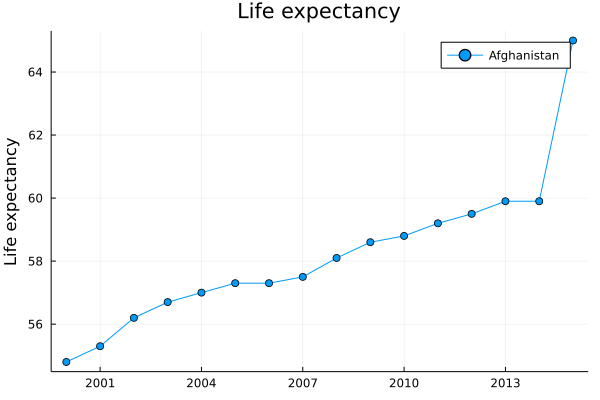

In [15]:
x = df[df.Country .== "Afghanistan", :].Year
y = df[df.Country .== "Afghanistan", :].Life_expectancy

plot(x, y, label="Afghanistan", title="Life expectancy", ylabel="Life expectancy", markershape=:circle)

But it does not tell us much by itself. Often, comparisons allows for a more intimate understanding of such quantities, but we do not know which countries are actually listed in the dataset. We can find out by printing their names 

In [16]:
for country in unique(df, :Country).Country
    println(country)
end

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Côte d'Ivoire
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
L

and plot time series of life expectancy for countries you might be familiar with

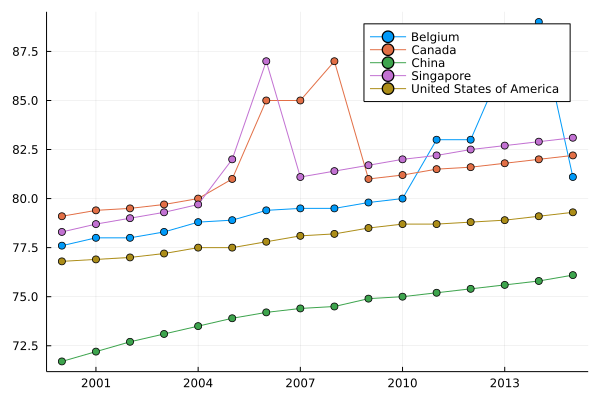

In [26]:
fig = plot()
for country in ["Belgium", "Canada", "China", "Singapore", "United States of America"]
    y = df[df.Country .== country, :].Life_expectancy
    plot!(x, y, label=country, markershape=:circle)
end
display(fig)

To begin to understand the relationship between life expectancy and the other features given in this table, let us reduce our analysis to the year 2012 (for the example)

In [28]:
df = df[df.Year .== 2012, :];

and generate a scatter plot of life expectancy and BMI

Union{Missing, Float64}[17.6, 55.8, 56.1, 21.5, 45.7, 61.0, 52.6, 65.0, 56.1, 49.7, 62.6, 61.5, 16.4, 52.2, 6.5, 62.6, 48.5, 24.1, 21.9, 5.6, 54.2, 36.2, 53.6, 38.2, 63.9, 17.7, 17.1, 26.2, 29.0, 17.6, 27.2, 65.3, 21.2, 17.9, 61.8, 3.0, 55.7, 22.6, 25.6, 57.5, 61.9, 59.2, 58.7, 64.5, 31.3, 2.1, 57.7, 33.2, 55.8, 52.1, 58.6, 54.1, 23.0, 17.0, 58.5, 16.4, 6.2, 61.0, 61.1, 34.6, 25.4, 53.6, 6.9, 26.7, 64.9, 45.6, 48.6, 21.7, 24.3, 44.1, 46.5, 48.4, 63.0, 59.7, 17.0, 24.7, 56.0, 57.2, 6.5, 63.8, 62.1, 52.0, 27.8, 63.2, 5.6, 2.1, 76.2, 69.5, 42.2, 19.4, 59.8, 64.4, 3.8, 25.6, 61.8, 6.9, 6.1, 19.0, 18.4, 37.4, 24.1, 21.9, 68.4, 28.8, 31.8, 61.5, 67.5, 49.2, 6.2, 55.5, 21.3, 21.3, 33.3, 17.4, 6.5, 65.9, 51.7, 18.1, 23.5, 59.8, 52.3, 23.2, 55.6, 46.4, 47.9, 53.6, 23.7, 59.7, 59.5, 67.0, 3.4, 51.5, 58.4, 58.7, 19.5, 45.2, 51.2, 73.4, 28.5, 65.6, 22.7, 58.3, 34.8, 22.7, 32.4, 57.2, 58.2, 48.1, 22.9, 48.7, missing, 64.8, 21.2, missing, 56.3, 3.7, 58.1, 56.2, 54.2, 38.2, 3.1, 58.5, 16.2, 22.6, 73.

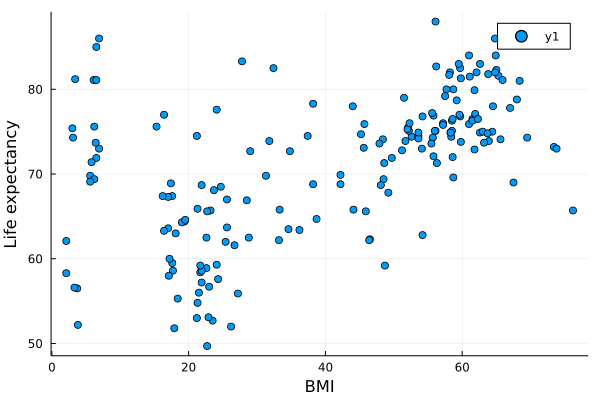

In [29]:
y = df.Life_expectancy
x = df.BMI

println(x)

scatter(x, y, ylabel="Life expectancy", xlabel="BMI")

## Linear regression analysis

`LinearAlgebra` is standard library of Julia. It provides native implementations of the most common linear algebra operations. Check out its documentation https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/ to learn more about it.

To quantify the linear relationship between life expectancy and BMI, we will fit a simple linear regression model by solving a least-squares problem with the backslash `\` operator [\[go further: Least squares in Julia\]](https://stanford.edu/class/engr108/lectures/julia_least_squares_slides.pdf) which solves for $x$ systems such that $Ax=y$.

In [31]:
#Pkg.add("LinearAlgebra")
using LinearAlgebra

In [32]:
new_df = dropmissing(df);

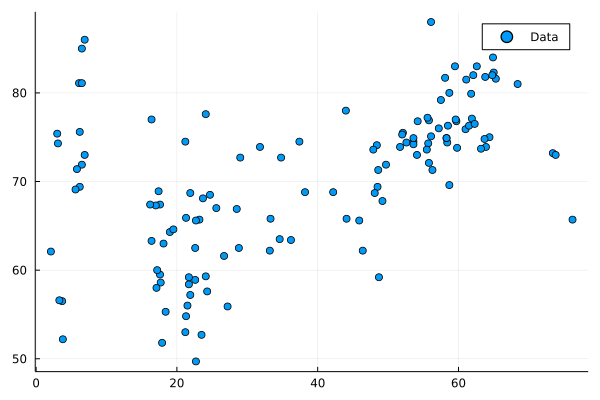

In [33]:
y = new_df.Life_expectancy
A = new_df.BMI

scatter(A, y, label="Data")

size(A) = (129,)
size(A') = (1, 129)
size(new_A) = (129, 2)
size(y) = (129,)
size(new_A\y) = (2,)
Regression line: 0.21347584448773013*x+62.12559780314264


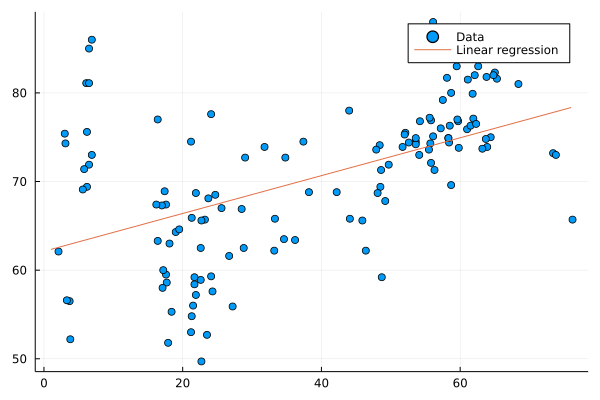

In [37]:
# Linear regression model: A*x+b=y -> new_A*x=y
y = new_df.Life_expectancy
A = new_df.BMI

scatter(A, y, label="Data")

println("size(A) = ", size(A))
println("size(A') = ", size(A'))

new_A = vcat(A', ones(size(A))')'

println("size(new_A) = ", size(new_A))
println("size(y) = ", size(y))

coefs = new_A\y # Cannot handle missing values (hence dropmissing() above)

println("size(new_A\\y) = ", size(new_A\y))
println("Regression line: ", coefs[1], "*x+", coefs[2])

x = minimum(new_A):maximum(new_A)
plot!(x, coefs[1]*x.+coefs[2], label="Linear regression")

Finally, let us quantify the fit of the linear regression model to the data via quality metrics

In [ ]:
Pkg.add("Statistics")

In [39]:
using Statistics

In [40]:
println("Pearson's correlation coefficient R = ", cor(new_df[:, :Life_expectancy], new_df[:, :BMI]))
print("Coefficient of determination R^2 = ", cor(new_df[:, :Life_expectancy], new_df[:, :BMI])^2)

Pearson's correlation coefficient R = 0.5249398609360935
Coefficient of determination R^2 = 0.27556185759960516

## Homework

Based on the results above, BMI seems not to be a very good predictor of life expectancy accross the world. Can you find a better explanatory variable using [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) models ? Try also using multiple explanatory variables in a [multiple linear regression](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression) to see if they provide better results.